# Machine Learning Project
### Spring 2024
### Chanyoung Park
## Predicting Credit Card Account Cancellations

<br>
<br>
<p align="center">
<img 
  src="./files/credit_cards.png" 
  alt="Car Accident" 
  width="500"
  height="350"
/>
</p>

<br>

## Introduction
This is an individual assignment and will be a chance for you to perform an applied data science project on a real data set. 

We will be working with the `credit_card_df` data frame in this project. This data set contains information on over 4,000 customers of a U.S. bank. The description of this data and the variables contained in it are provided below.

The objective of this project is to explore the factors that lead to customers canceling their credit card accounts and develop machine learning algorithms that will predict the likelihood of a customer canceling their account in the future.

## Credit Card Account Data

The `credit_card_df` data frame contains information on the customers of a large U.S. bank which provides a number of financial services including multiple credit card offerings. 

The bank is looking to see if it can determine the factors that lead to customers canceling their credit card account and whether it can predict if a customer will cancel their account in the future. 

To maintain profits, banks must maximize the number of customers with credit lines. It is also in their best interests for customers to carry large credit card balances from month-to-month to maximize revenue from interest charges.

The bank has experienced record levels of customers closing their credit accounts in the past couple of years and this is leading to declining revenue.

The bank's goal is to become better at identifying customers at risk of canceling their account to minimize financial losses.

Specifically, the broad questions that the company is trying to answer include:

<br>

- What are the factors that are associated with customers closing their credit card accounts?
- Is it possible to predict whether a customer will close their account? If so, how accurate are the predictions?
  - How many costly errors is the model expected to produce?
- Are there any actions or policies the company can implement to reduce the risk of losing their customers?

<br>

The data set contains a mixture of customer demographics and their financial behavior.

The outcome variable in this data is `customer_status`. This variable records whether a customer eventually closed their account and indicates a financial loss to the company.

**Note**: The outcome variable has been coded as a factor with 'closed_account' (**the positive class**) as the first level. This is the format that `tidymodels` expects for calculating model performance metrics. There is no need to recode this variable in your machine learning process.

<br>

### Data Definitions

| Variable            	     | Definition                                 	                | Data Type    |
|:---------------------------|:-------------------------------------------------------------|:-------------|
| customer_status            | Customer status (closed account or active)                   | Factor       |
| age                        | Customer age                                                 | Numeric      |
| dependents                 | Number of dependents in household                            | Numeric      |
| education                  | Customer education level                                     | Factor       |
| marital_status             | Marital status                                               | Factor       |
| employment_status          | Employment status                                            | Factor       |
| income                     | Annual income (US Dollars)                                   | Numeric      |
| card_type                  | Type of credit card                                          | Factor       |
| months_since_first_account | Months since first credit card account activated             | Numeric      |
| total_accounts             | Total accounts (credit checking and savings)                 | Numeric      |
| months_inactive_last_year  | Months without credit card activity last year                | Numeric      |
| contacted_last_year        | Number of times contacted last year by sales representatives | Numeric      |
| credit_limit               | Current credit limit                                         | Numeric      |
| utilization_ratio          | Average monthly balance to credit limit                      | Numeric      |
| spend_ratio_q4_q1          | Ratio of total Q4 to Q1 spending last year                   | Numeric      |
| total_spend_last_year      | Total amount charged last year                               | Numeric      |
| transactions_last_year     | Number of transactions last year                             | Numeric      |
| transaction_ratio_q4_q1    | Ratio of total Q4 to Q1 transactions last year               | Numeric      |

In [87]:
# Load data
library(tidyverse)

credit_card_df <- readRDS(url('https://gmubusinessanalytics.netlify.app/data/credit_card_df.rds'))

In [88]:
# View data
credit_card_df

customer_status,age,dependents,education,marital_status,employment_status,income,card_type,months_since_first_account,total_accounts,months_inactive_last_year,contacted_last_year,credit_limit,utilization_ratio,spend_ratio_q4_q1,total_spend_last_year,transactions_last_year,transaction_ratio_q4_q1
<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
closed_account,46,3,masters,married,self_employed,67807,blue,36,2,3,4,4267,0.000,0.862,1067,23,0.769
closed_account,46,3,associates,married,self_employed,51785,blue,34,2,3,2,8583,0.000,0.358,1794,31,0.292
closed_account,44,4,masters,single,part_time,105643,gold,36,5,3,2,2367,0.678,0.956,4506,59,0.639
closed_account,62,1,masters,single,part_time,34138,gold,56,1,2,1,3109,0.000,1.054,5470,72,0.674
closed_account,38,1,masters,married,full_time,36264,blue,20,2,2,3,1621,0.358,0.421,1893,41,0.171
closed_account,43,3,associates,single,part_time,84234,blue,30,3,2,4,11336,0.000,0.691,1809,39,0.345
active,43,2,masters,married,full_time,35379,blue,35,3,1,3,4092,0.152,0.775,5001,88,0.492
closed_account,39,3,associates,married,part_time,67047,blue,29,4,3,4,2187,0.000,0.467,2031,40,0.333
active,54,1,masters,single,full_time,35903,gold,47,6,3,4,12873,0.000,1.005,3170,70,0.842


# Exploratory Data Analysis (50 Points)

In this section, you must think of at least 5 relevant questions that explore the relationship between `customer_status` and the other variables in the `credit_card_df` data set. The goal of your analysis should be discovering which variables drive the differences between customers who do and do not close their account.

You must answer each question and provide supporting data summaries with either a summary data frame (using `dplyr`/`tidyr`) or a plot (using `ggplot`) or both.

In total, you must have a minimum of 3 plots (created with `ggplot`) and 3 summary data frames (created with `dplyr`) for the exploratory data analysis section. Among the plots you produce, you must have at least 3 different types (ex. box plot, bar chart, histogram, scatter plot, etc...)

Each question must be answered with **supporting evidence** from your tables and plots.

See the example question below.

### Sample Question
The sample below is from a previous semester where students analyzed a dataset, **employee_df**, with information on employees of a company and whether they decided to leave the company for another job.

The question, `R` code, and answer are examples of the correct style and language that you should use for your work.

### Question

*Is there a relationship between employees leaving the company and their current salary?*

**Answer**: Yes, the data indicates that employees who leave the company tend to have lower salaries when compared to employees who do not. Among the 237 employees that left the company, the average salary was \$76,625. This is over \$20,000 less than the average salary of employees who did not leave the company.

Among the employees *who did not leave the company*, only 10% have a salary that is less than or equal to \$60,000. When looking at employees who did leave the company, this increases to 34%.

### Supporting Table and Visualization

Note - the sample code and output below is an image, not code cells

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_table.jpg"
  width="650"
  height="auto"
/>
</p>

<br>
<br>
<br>

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_plot.jpg"
  width="650"
  height="auto"
/>
</p>


## Question 1


**Question**:
How does the age and income distribution differ between customers who close their account and those who do not? 


**Answer**:
The analysis of the data shows that the age distribution is quite similar for both customers who closed their accounts and those who did not, suggesting that age may not be a significant factor in the decision to close a credit card account. The average age for active customers is approximately 46.22 years, and for closed accounts, it's slightly higher at about 46.56 years.

In terms of income, the distributions again are similar, with active customers having an average income of around $62,843, compared to $61,602 for customers who have closed their accounts. This minor difference indicates that income level might not be a decisive factor for closing an account.

## Supporting Analysis

In [89]:
# This code adjusts the figure output size in the notebook
options(repr.plot.width=11, repr.plot.height=8)

customer_status,Average_Age,Average_Income
<fct>,<dbl>,<dbl>
closed_account,46.56166,61601.51
active,46.21696,62842.83


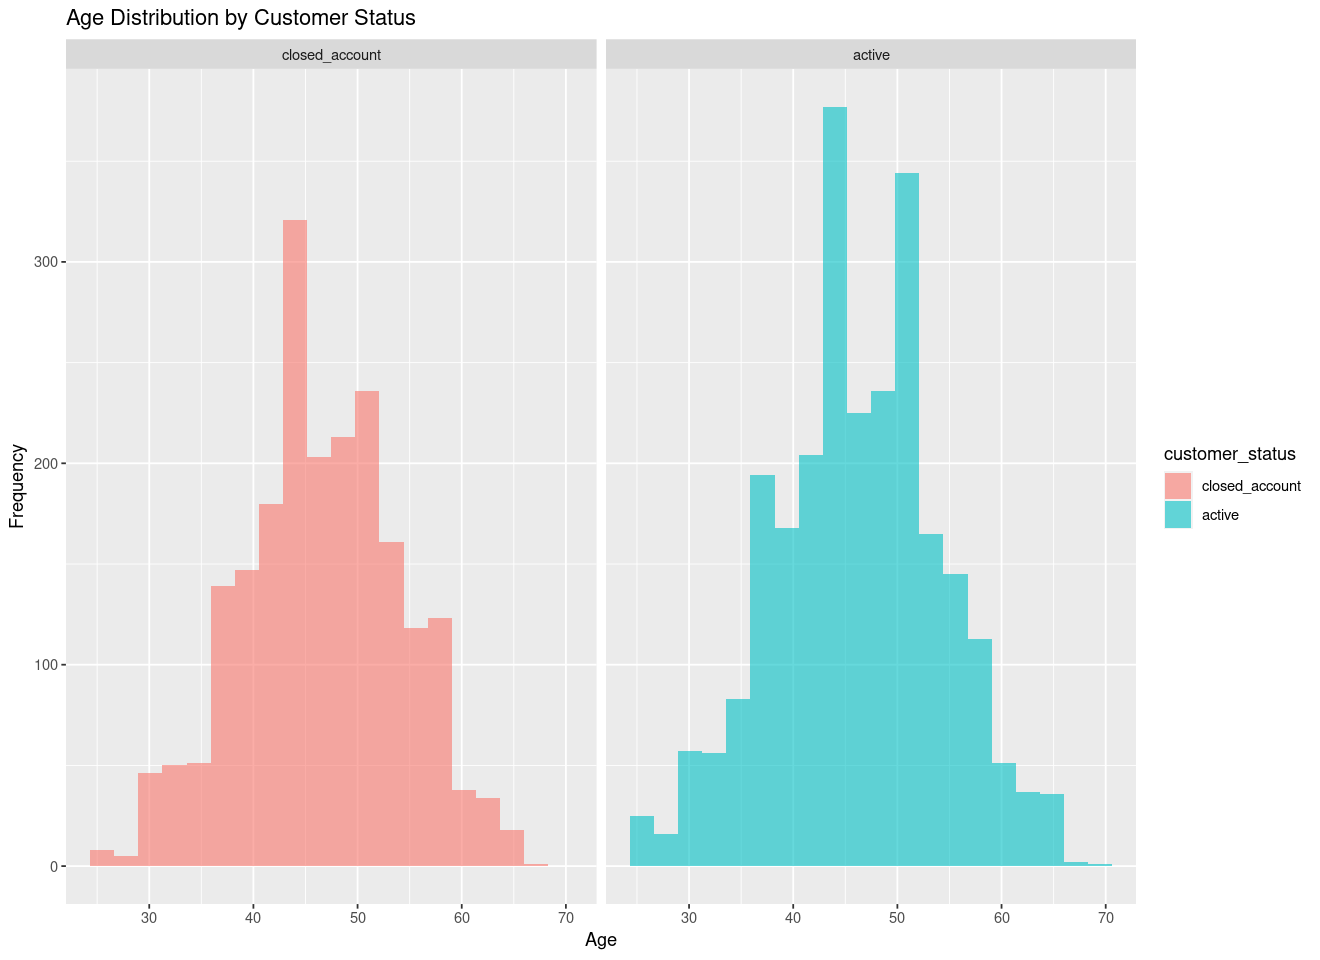

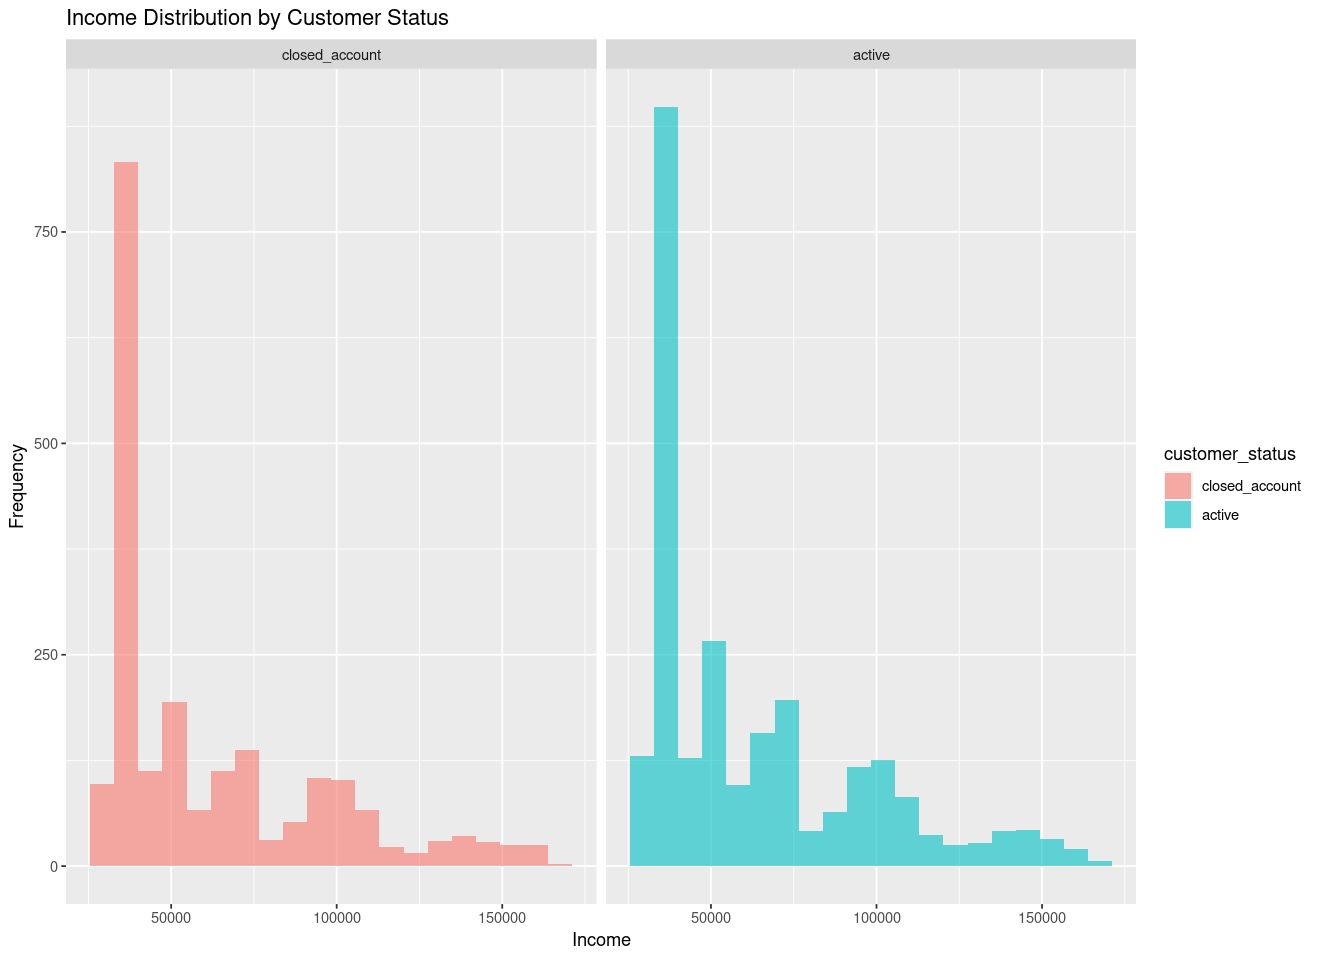

In [90]:
library(dplyr)
library(ggplot2)

# Summary dataframe for Age and Income by Customer Status
age_income_summary <- credit_card_df %>%
  group_by(customer_status) %>%
  summarise(Average_Age = mean(age, na.rm = TRUE),
            Average_Income = mean(income, na.rm = TRUE))
age_income_summary

# Age Distribution Plot
ggplot(credit_card_df, aes(x = age, fill = customer_status)) +
  geom_histogram(alpha = 0.6, bins = 20) +
  facet_wrap(~customer_status) +
  labs(title = "Age Distribution by Customer Status", x = "Age", y = "Frequency")

# Income Distribution Plot
ggplot(credit_card_df, aes(x = income, fill = customer_status)) +
  geom_histogram(alpha = 0.6, bins = 20) +
  facet_wrap(~customer_status) +
  labs(title = "Income Distribution by Customer Status", x = "Income", y = "Frequency")











## Question 2


**Question**:
Does marital status influence the likelihood of closing an account? 


**Answer**:
The data suggests that marital status might have an influence on the decision to close an account. Married customers show a higher number of closed accounts compared to their single or divorced counterparts. Specifically, out of the married customer segment, there are 1,277 active accounts and 989 closed accounts, which indicates a substantial proportion of account closures. For single customers, the numbers are 1,063 active accounts to 944 closed accounts, showing a more balanced ratio but still a notable number of closures.

## Supporting Analysis


marital_status,closed_account,active
<fct>,<int>,<int>
single,944,1063
married,989,1277
divorced,159,195


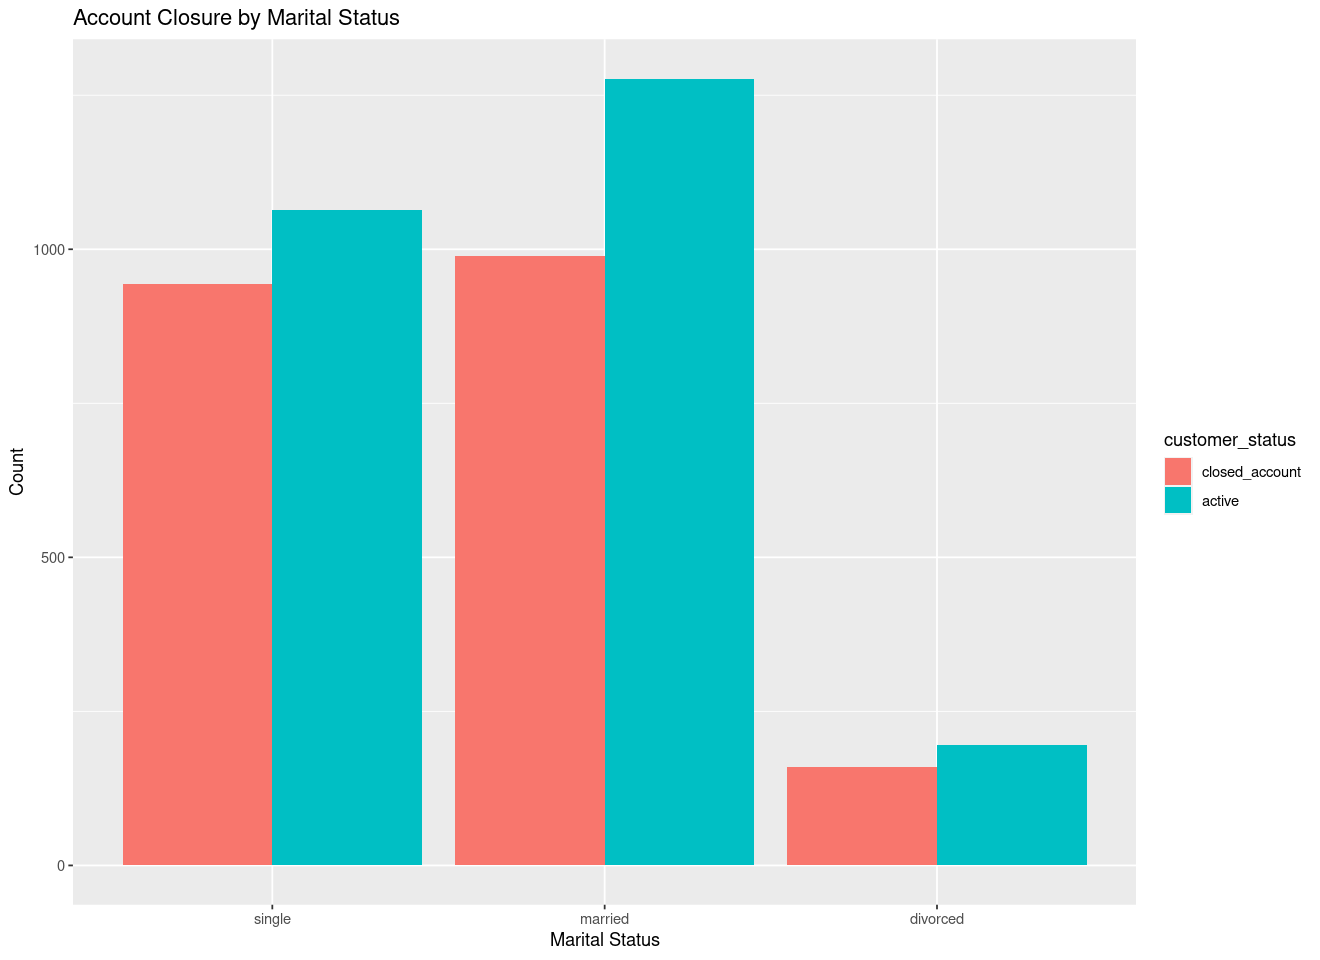

In [91]:
# Summary dataframe
marital_status_summary <- credit_card_df %>%
  count(customer_status, marital_status) %>%
  spread(key = customer_status, value = n)
marital_status_summary

# Bar plot
ggplot(credit_card_df, aes(x = marital_status, fill = customer_status)) +
  geom_bar(position = "dodge") +
  labs(title = "Account Closure by Marital Status", x = "Marital Status", y = "Count")










## Question 3


**Question**:
Is there a relationship between credit card utilization and account closure?


**Answer**:
Yes, there appears to be a relationship between credit card utilization and account closure. Customers with active accounts have a higher average credit card utilization ratio (approximately 0.29) than those who have closed their accounts (average utilization ratio around 0.16). This suggests that customers who make more use of their available credit are less likely to close their accounts.

## Supporting Analysis


customer_status,Count,Mean,SD,Median,IQR,Min,1st_Quartile,3rd_Quartile,Max
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
closed_account,2092,0.1610186,0.2643019,0.000,0.22725,0,0.000,0.22725,0.999
active,2535,0.2894635,0.2686318,0.207,0.46550,0,0.053,0.51850,0.983


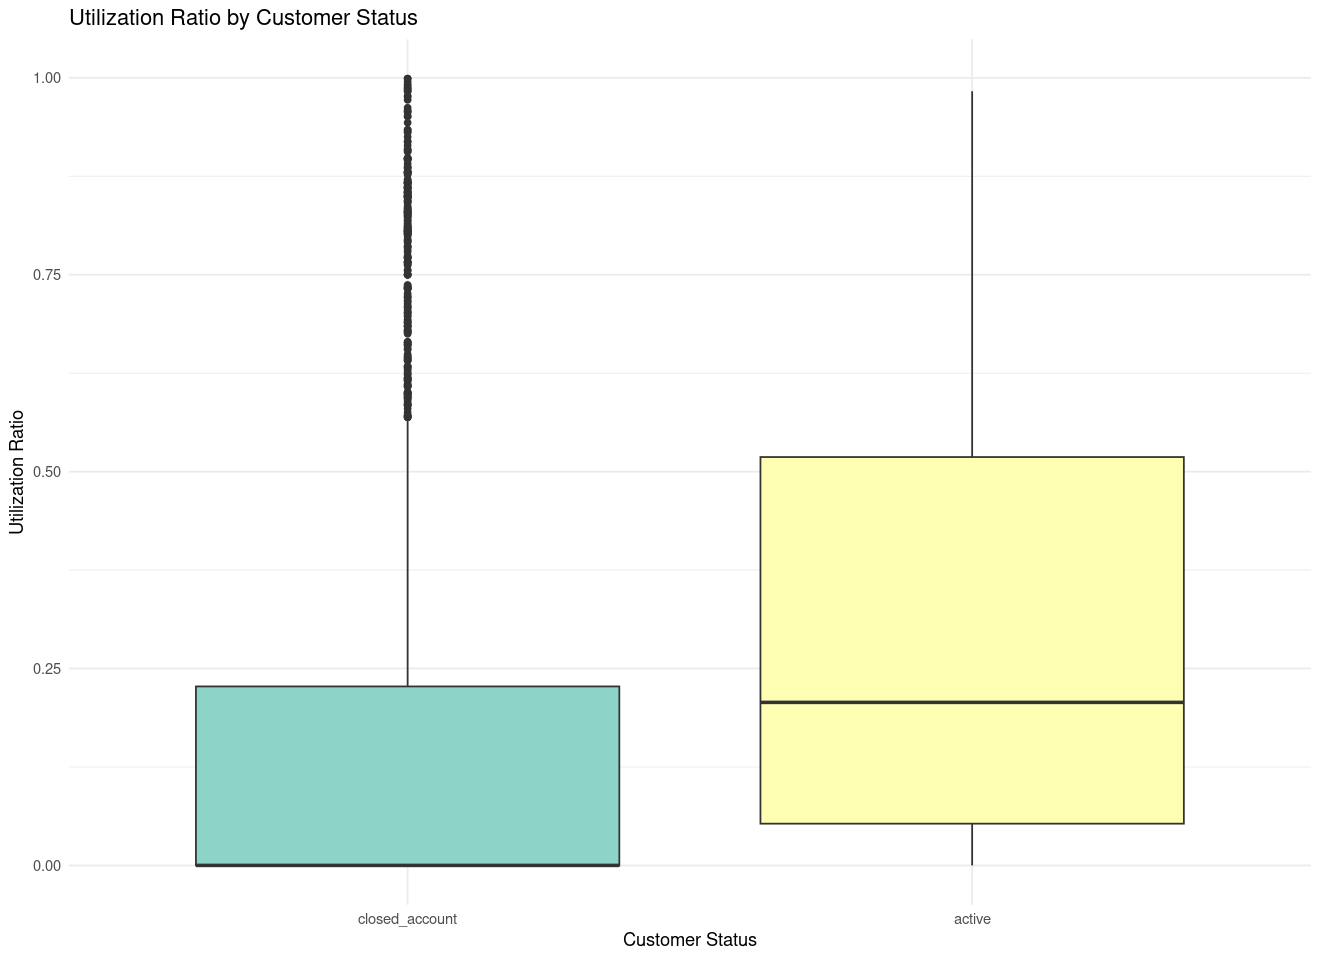

In [92]:
library(dplyr)

# Calculate the detailed summary statistics for utilization ratio by customer status
utilization_summary <- credit_card_df %>%
  group_by(customer_status) %>%
  summarise(
    Count = n(),
    Mean = mean(utilization_ratio, na.rm = TRUE),
    SD = sd(utilization_ratio, na.rm = TRUE),
    Median = median(utilization_ratio, na.rm = TRUE),
    IQR = IQR(utilization_ratio, na.rm = TRUE),
    Min = min(utilization_ratio, na.rm = TRUE),
    `1st_Quartile` = quantile(utilization_ratio, 0.25, na.rm = TRUE),
    `3rd_Quartile` = quantile(utilization_ratio, 0.75, na.rm = TRUE),
    Max = max(utilization_ratio, na.rm = TRUE)
  ) %>%
  ungroup() 

# Summary dataframe for utilization ratio
utilization_summary


library(ggplot2)

# Boxplot for Utilization Ratio by Customer Status
ggplot(credit_card_df, aes(x = customer_status, y = utilization_ratio, fill = customer_status)) +
  geom_boxplot() +
  scale_fill_brewer(palette = "Set3") + 
  labs(title = "Utilization Ratio by Customer Status",
       x = "Customer Status",
       y = "Utilization Ratio") +
  theme_minimal() +
  theme(legend.position = "none")  






## Question 4


**Question**:
Do customers who have been inactive for longer periods or contacted less frequently by the bank more likely to close their accounts? 

**Answer**:
The data indicates that inactivity and less frequent contact are associated with a higher likelihood of account closure. Customers who closed their accounts show, on average, longer periods of inactivity last year (about 2.69 months) compared to active customers (approximately 2.26 months). Additionally, those who closed their accounts were contacted more frequently last year (an average of 2.98 times) than those with active accounts (an average of 2.39 times), suggesting that while increased contact by the bank might be a response to potential account closure signals, it may not be effective in retaining the customer.

## Supporting Analysis


customer_status,Average_Months_Inactive,Average_Contacted
<fct>,<dbl>,<dbl>
closed_account,2.691205,2.978489
active,2.261538,2.389744


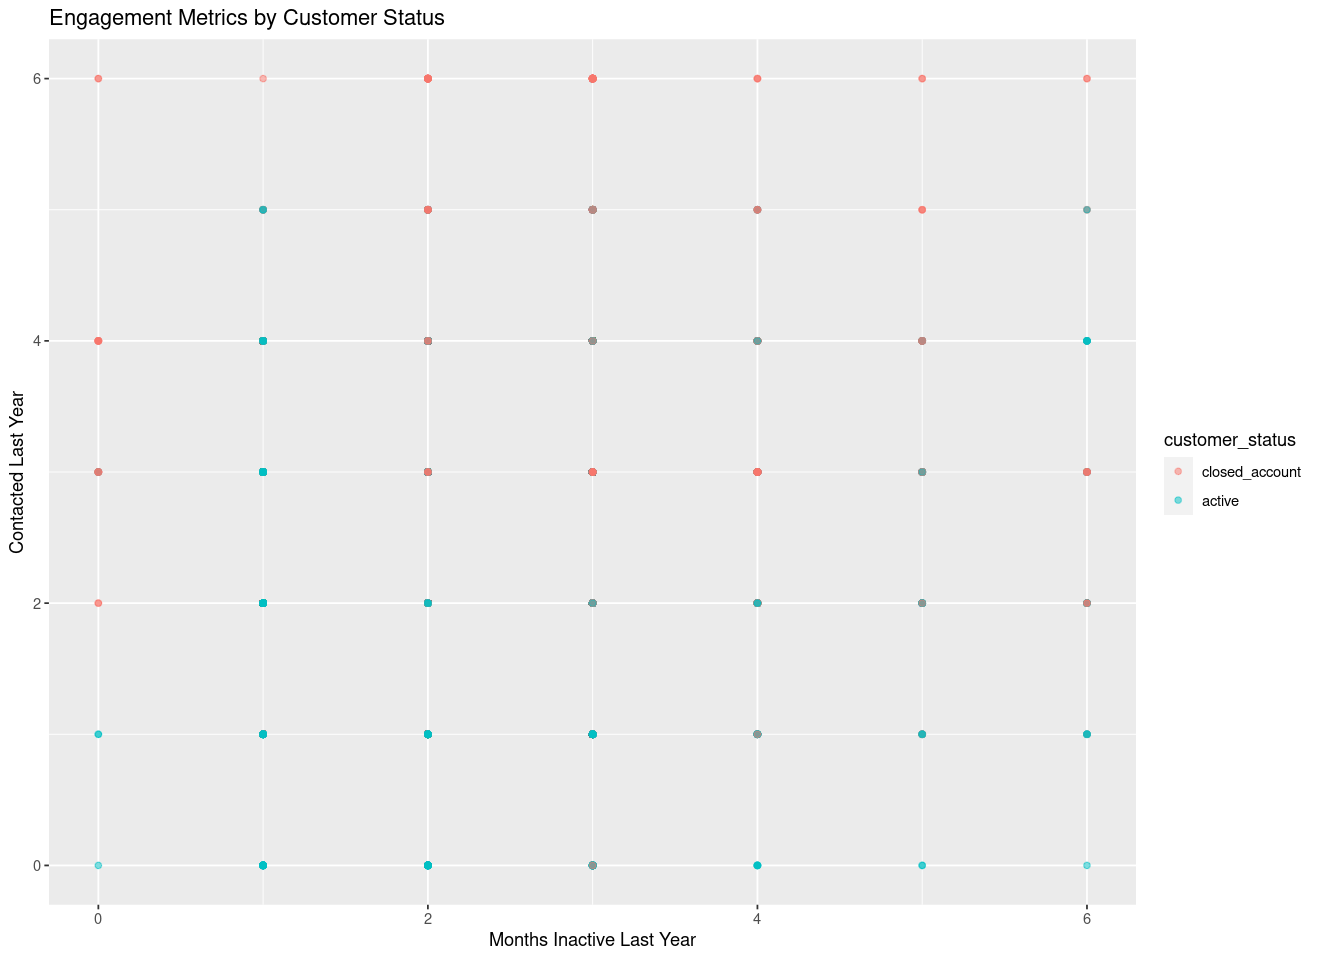

In [93]:
# Summary dataframe
engagement_summary <- credit_card_df %>%
  group_by(customer_status) %>%
  summarise(Average_Months_Inactive = mean(months_inactive_last_year, na.rm = TRUE),
            Average_Contacted = mean(contacted_last_year, na.rm = TRUE))

engagement_summary

# Scatter plot 
ggplot(credit_card_df, aes(x = months_inactive_last_year, y = contacted_last_year, color = customer_status)) +
  geom_point(alpha = 0.5) +
  labs(title = "Engagement Metrics by Customer Status", x = "Months Inactive Last Year", y = "Contacted Last Year")






## Question 5


**Question**:
How does the change in spending and transaction activity from Q4 to Q1 affect account closure?


**Answer**:
The change in spending and transaction activity from Q4 to Q1 seems to affect account closure. Customers who remained with the bank demonstrate a higher average spend ratio from Q4 to Q1 (0.77) than those who closed their accounts (0.70). Moreover, the average transaction ratio for active customers is higher (0.74) compared to that of closed account customers (0.56). This points to a trend where decreases in spending and transaction activity could signal an increased likelihood of account closure, highlighting the importance of consistent customer activity for retention.


## Supporting Analysis


customer_status,Average_Spend_Ratio,Median_Spend_Ratio,Average_Transaction_Ratio,Median_Transaction_Ratio
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
closed_account,0.6951463,0.701,0.5554670,0.531
active,0.7712134,0.739,0.7367661,0.714


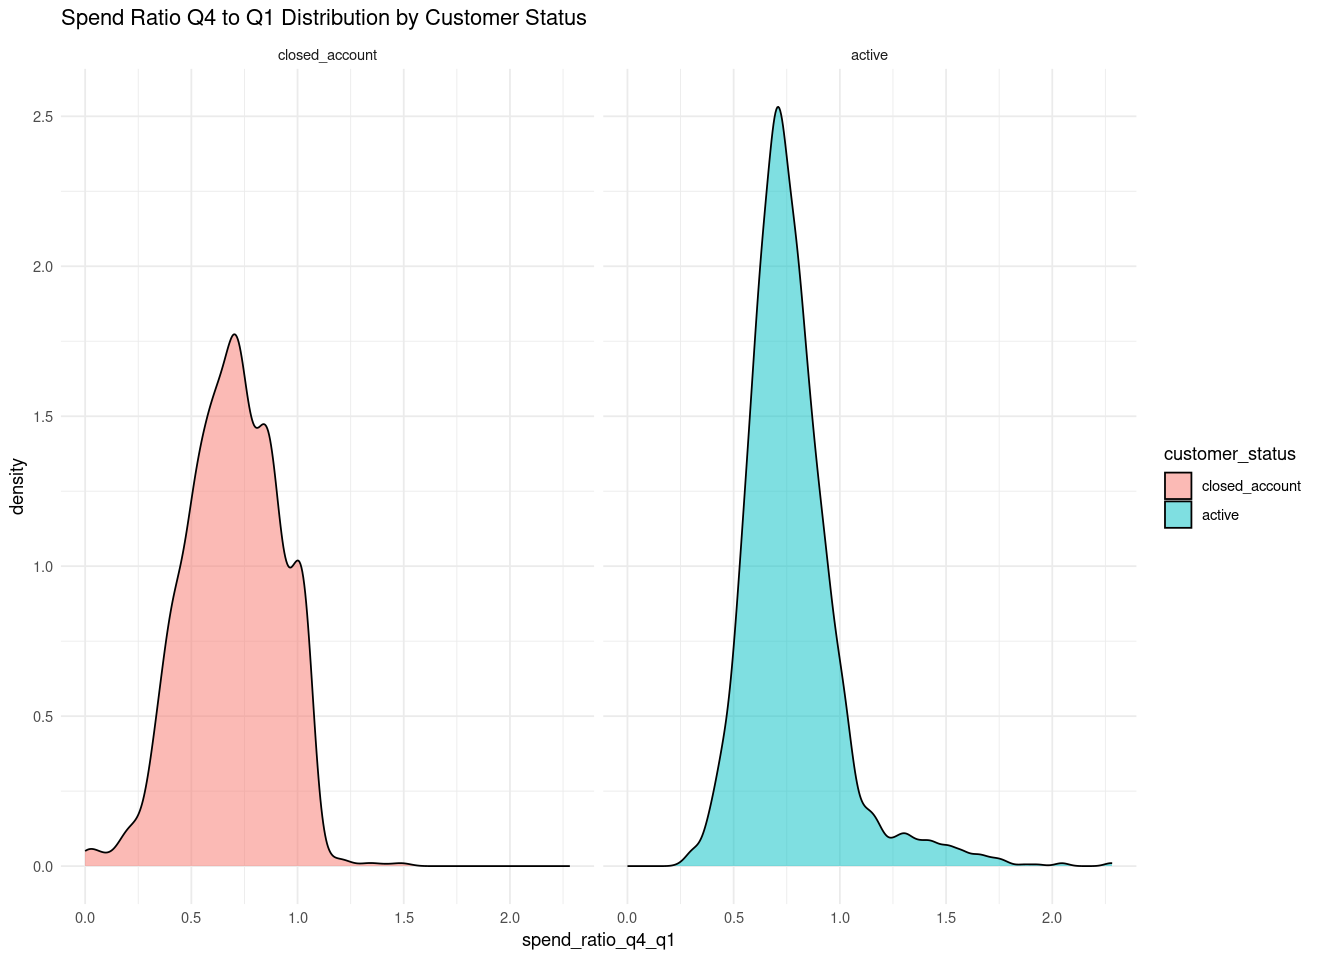

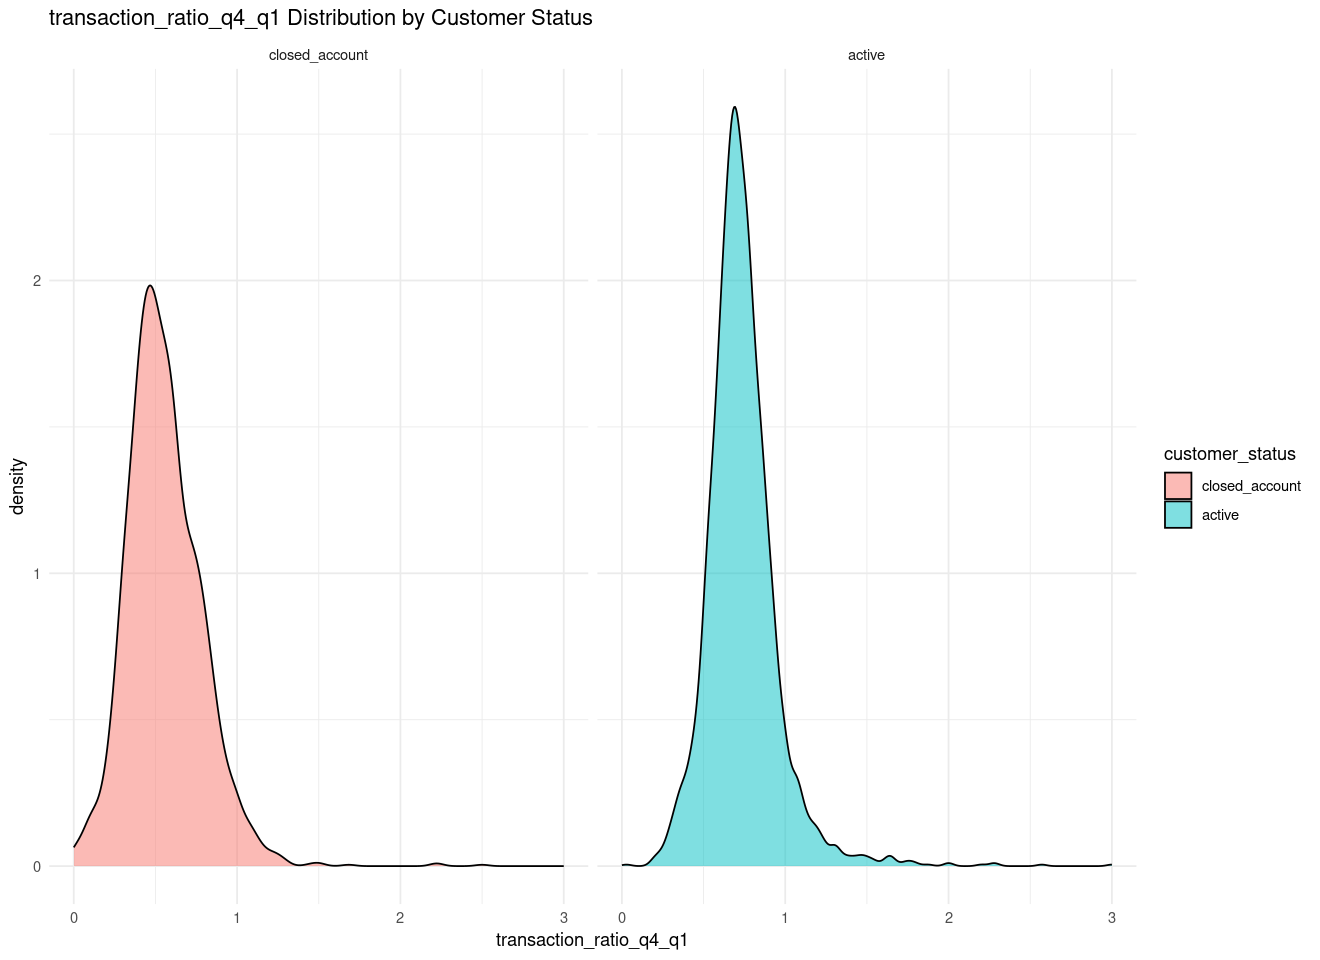

In [94]:
# Summary
credit_card_df %>%
  group_by(customer_status) %>%
  summarise(Average_Spend_Ratio = mean(spend_ratio_q4_q1, na.rm = TRUE),
            Median_Spend_Ratio = median(spend_ratio_q4_q1, na.rm = TRUE),
            Average_Transaction_Ratio = mean(transaction_ratio_q4_q1, na.rm = TRUE),
            Median_Transaction_Ratio = median(transaction_ratio_q4_q1, na.rm = TRUE))

# Distribution Comparison using Density Plots
ggplot(credit_card_df, aes(x = spend_ratio_q4_q1, fill = customer_status)) +
  geom_density(alpha = 0.5) +
  facet_wrap(~customer_status) +
  theme_minimal() +
  labs(title = "Spend Ratio Q4 to Q1 Distribution by Customer Status")

ggplot(credit_card_df, aes(x = transaction_ratio_q4_q1, fill = customer_status)) +
  geom_density(alpha = 0.5) +
  facet_wrap(~customer_status) +
  theme_minimal() +
  labs(title = "transaction_ratio_q4_q1 Distribution by Customer Status")






# Machine Learning Modeling (75 Points)
In this section of the project, you will fit **three classification algorithms** to predict the outcome variable,`customer_status`.

You must follow the machine learning steps below. 

The data splitting and feature engineering steps should only be done once so that your models are using the same data and feature engineering steps for training.

1. Split the `credit_card_df` data into a training and test set (remember to set your seed)
2. Specify a feature engineering pipeline with the `recipes` package
    - You can include steps such as skewness transformation, dummy variable encoding or any other steps you find appropriate
3. Specify a `parsnip` model object
    - You may choose from the following classification algorithms:
      - Logistic Regression
      - LDA
      - QDA
      - KNN
      - Decision Tree
      - Random Forest
4. Package your recipe and model into a workflow
5. Fit your workflow to the training data
    - If your model has hyperparameters:
      - Split the training data into 5 folds for 5-fold cross validation using `vfold_cv` (remember to set your seed)
      - Perform hyperparamter tuning with a random grid search using the `grid_random()` function
      - Refer to the following tutorial for an example - [Random Grid Search](https://gmubusinessanalytics.netlify.app/lesson-08-r-tutorial.html#Hyperparameter_Tuning14)
      - Hyperparameter tuning can take a significant amount of computing time. Be careful not to set the `size` argument of `grid_random()` too large. I recommend `size` = 10 or smaller.
      - Select the best model with `select_best()` and finalize your workflow
6. Evaluate model performance on the test set by plotting an ROC curve using `autoplot()` and calculating the area under the ROC curve on your test data

In [95]:
# Run this R code to install ML packages that you might need (Will take about 1 minute)
install.packages('vip')

Installing vip [0.4.1] ...
	OK [linked cache]


## Data Resampling
First split your data into training and test sets. If performing hyperparameter tuning, also create folds from your training data

In [96]:
library(tidymodels)

set.seed(123) # Set seed for reproducibility
data_split <- initial_split(credit_card_df, prop = 0.8) # 80-20 split
train_data <- training(data_split)
test_data <- testing(data_split)

# If hyperparameter tuning is needed, create folds from the training data
folds <- vfold_cv(train_data, v = 5, strata = customer_status)




## Feature Engineering Pipeline
Specify your feature engineering pipeline with the `recipes` package. You will use the pipeline when you create your modeling workflows below for each of your models.

In [98]:
library(recipes)

recipe <- recipe(customer_status ~ ., data = train_data) %>%
  step_normalize(all_numeric(), -all_outcomes()) %>% # Normalize numeric features
  step_dummy(all_nominal(), -all_outcomes())         # Create dummy variables



## Model 1 Training

In [100]:
library(parsnip)

# Specify a logistic regression model
logistic_spec <- logistic_reg() %>%
  set_engine("glm") %>%
  set_mode("classification")

# Package the recipe and model into a workflow
workflow <- workflow() %>%
  add_recipe(recipe) %>%
  add_model(logistic_spec)

# Fit the workflow to the training data
logistic_fit <- workflow %>%
  fit(data = train_data)





## Model 1 Performance Evaluation

# A tibble: 1 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 roc_auc binary         0.944


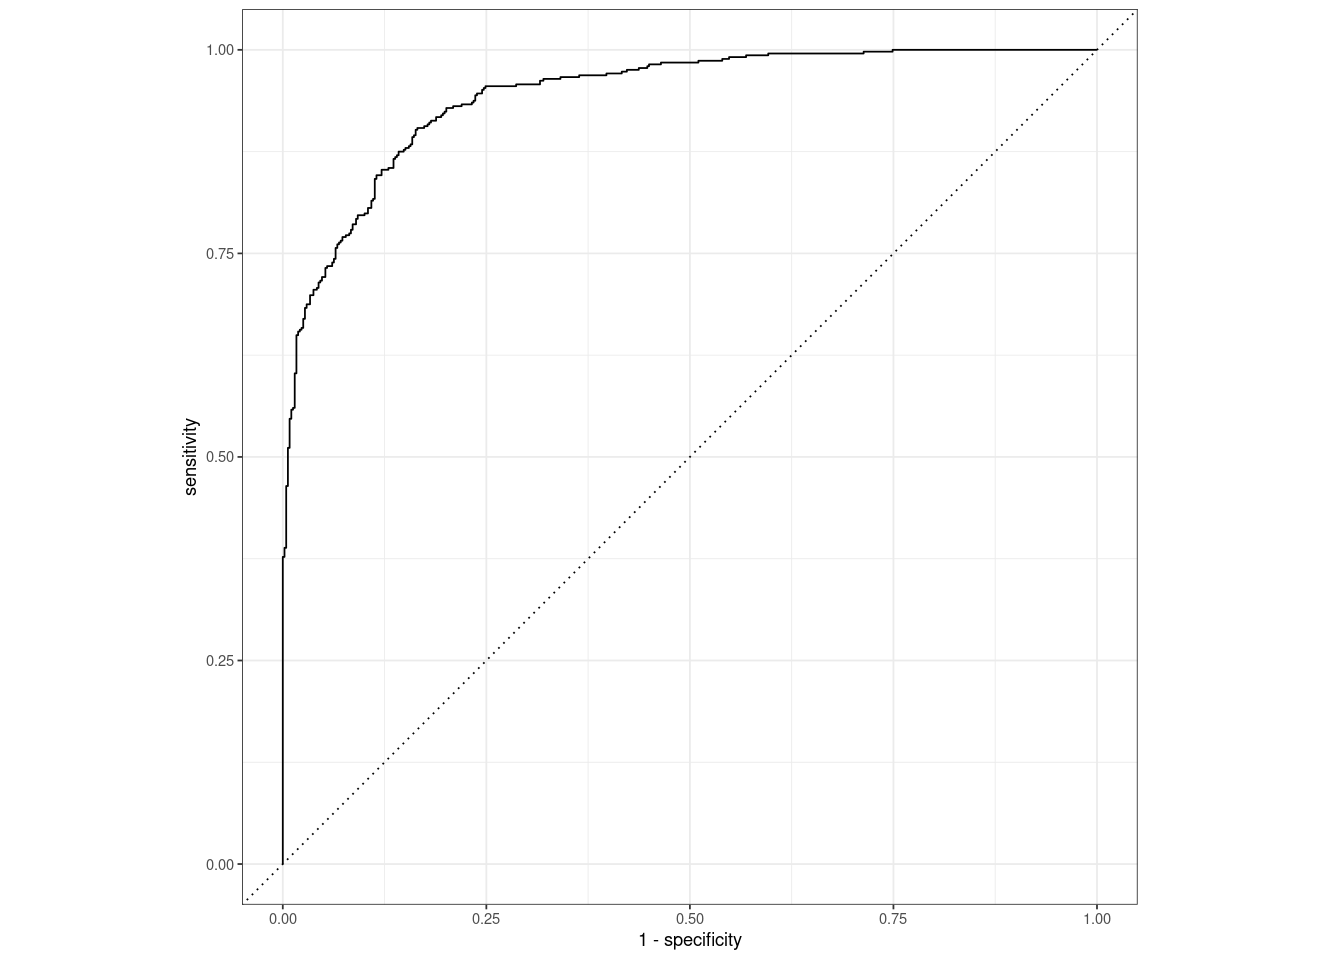

In [102]:
library(yardstick)

# Predict on the test data
logistic_results <- predict(logistic_fit, test_data, type = "prob")

# Bind the actual results
logistic_results <- logistic_results %>%
  bind_cols(test_data %>% select(customer_status))

# Calculate ROC AUC for the positive class 'closed_account'
logistic_auc <- logistic_results %>%
  roc_auc(truth = customer_status, .pred_closed_account)

# Print the AUC
print(logistic_auc)

# Plot ROC curve
logistic_roc_curve <- logistic_results %>%
  roc_curve(truth = customer_status, .pred_closed_account) %>%
  autoplot()

# Print the ROC curve plot
print(logistic_roc_curve)





## Model 2 Training

In [104]:
# Specify the random forest model
rf_spec <- rand_forest(trees = 1000) %>%
  set_engine("ranger") %>%
  set_mode("classification")

# Create a workflow
rf_workflow <- workflow() %>%
  add_recipe(recipe) %>%
  add_model(rf_spec)

# Fit the workflow to the training data
rf_fit <- rf_workflow %>%
  fit(data = train_data)


## Model 2 Performance Evaluation

# A tibble: 1 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 roc_auc binary         0.992


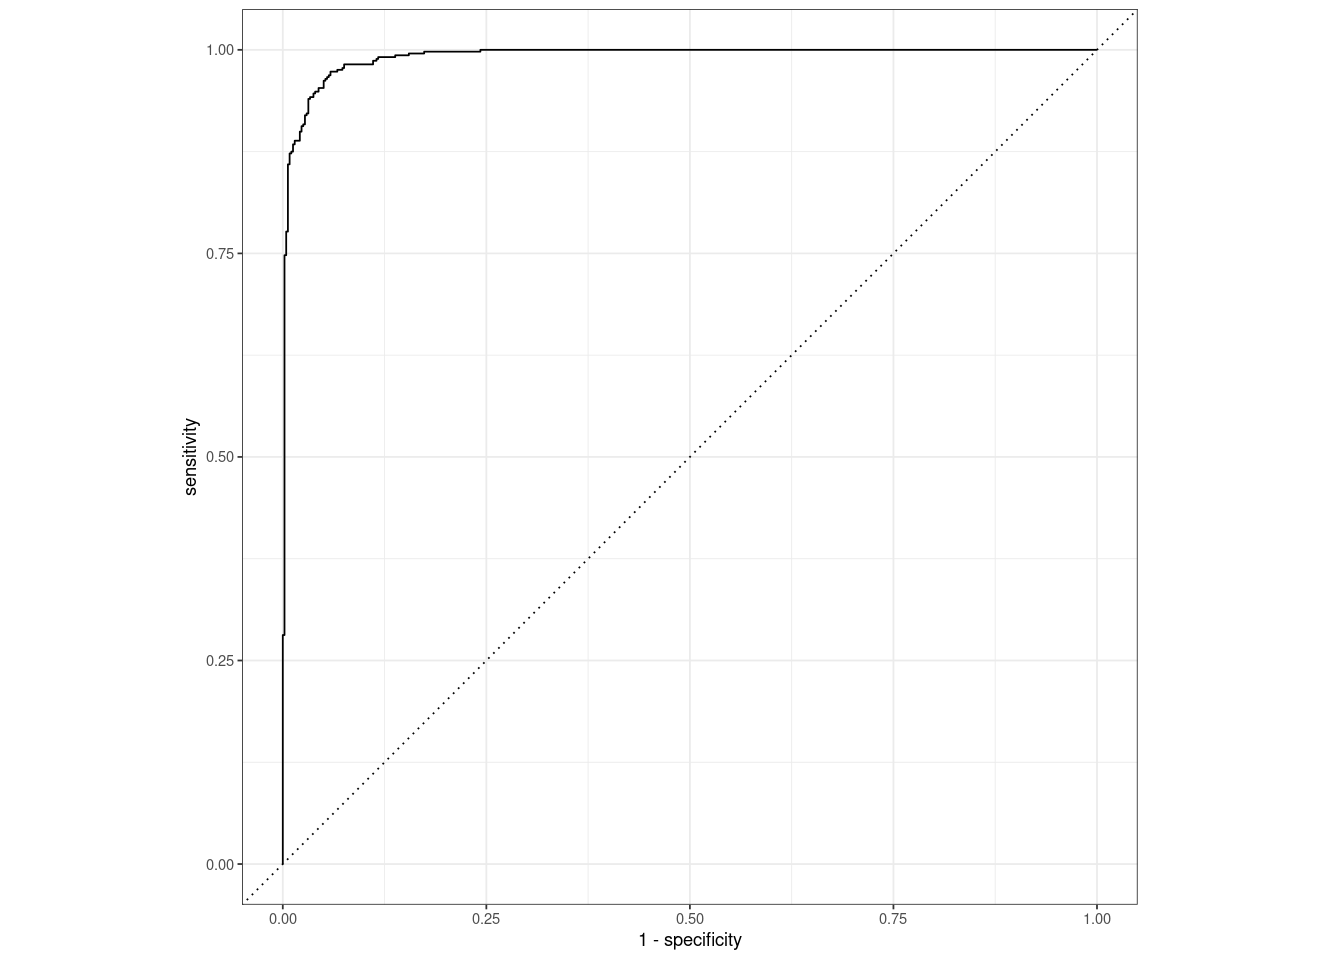

In [106]:
# Predict on the test data
rf_results <- predict(rf_fit, test_data, type = "prob")

# Bind the actual results
rf_results <- rf_results %>%
  bind_cols(test_data %>% select(customer_status))

# Calculate ROC AUC for the positive class 'closed_account'
rf_auc <- rf_results %>%
  roc_auc(truth = customer_status, .pred_closed_account)

# Print the AUC
print(rf_auc)

# Plot ROC curve
rf_roc_curve <- rf_results %>%
  roc_curve(truth = customer_status, .pred_closed_account) %>%
  autoplot()

# Print the ROC curve plot
print(rf_roc_curve)


## Model 3 Training

In [108]:
# Specify the decision tree model
tree_spec <- decision_tree() %>%
  set_engine("rpart") %>%
  set_mode("classification")

# Create a workflow
tree_workflow <- workflow() %>%
  add_recipe(recipe) %>%
  add_model(tree_spec)

# Fit the workflow to the training data
tree_fit <- tree_workflow %>%
  fit(data = train_data)


## Model 3 Performance Evaluation

# A tibble: 1 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 roc_auc binary         0.915


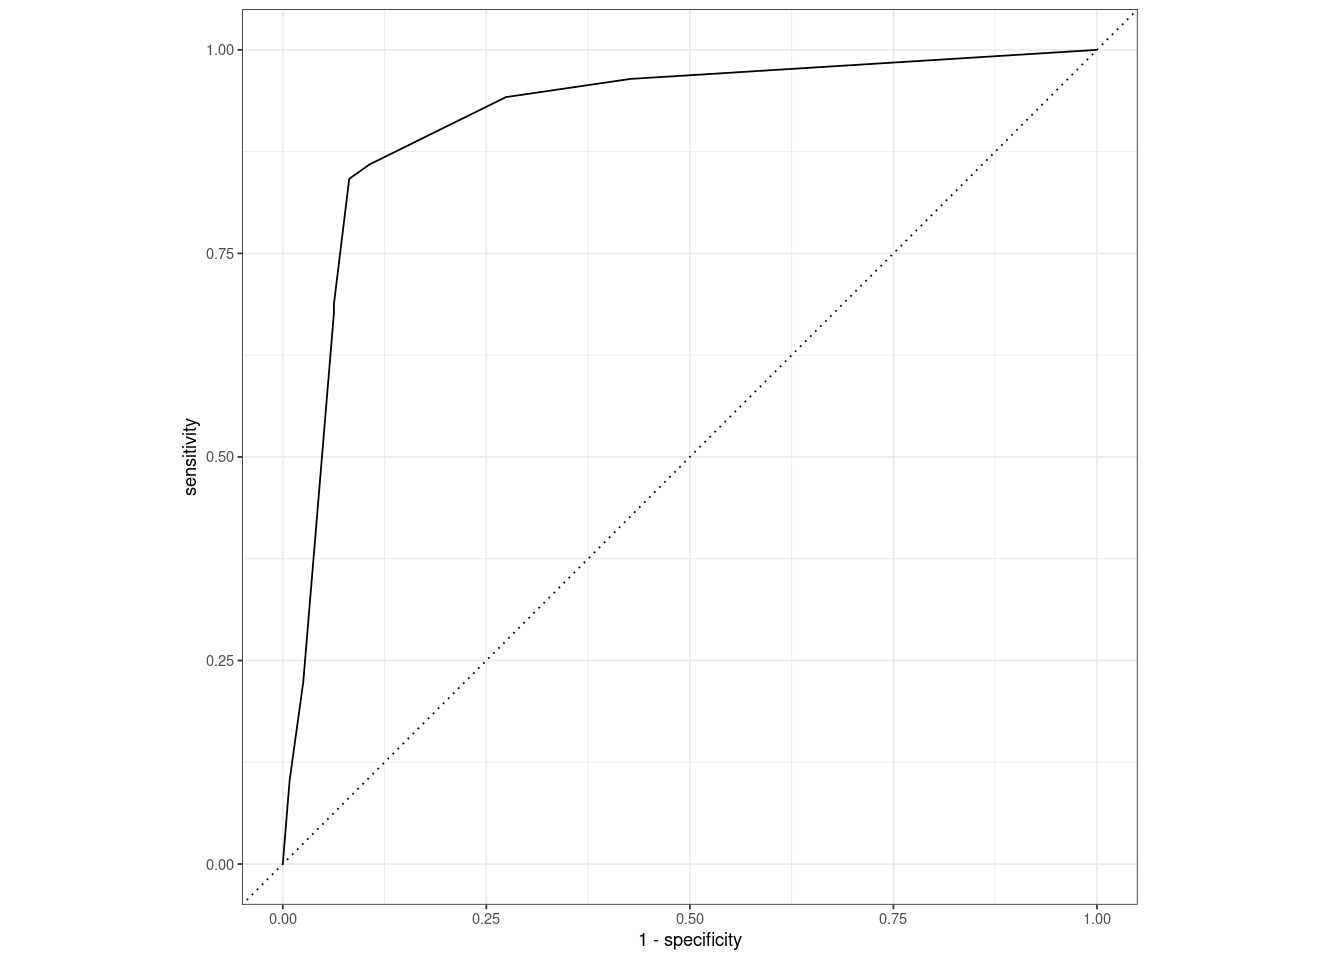

In [110]:
# Predict on the test data
tree_results <- predict(tree_fit, test_data, type = "prob")

# Bind the actual results
tree_results <- tree_results %>%
  bind_cols(test_data %>% select(customer_status))

# Calculate ROC AUC for the positive class 'closed_account'
tree_auc <- tree_results %>%
  roc_auc(truth = customer_status, .pred_closed_account)

# Print the AUC
print(tree_auc)

# Plot ROC curve
tree_roc_curve <- tree_results %>%
  roc_curve(truth = customer_status, .pred_closed_account) %>%
  autoplot()

# Print the ROC curve plot
print(tree_roc_curve)


# Executive Summary (25 Points)

Write an executive summary of your overall findings and recommendations to the executives at the bank. Think of this section as your closing remarks of a presentation, where you summarize your key findings, model performance, and make recommendations to improve customer retention and service at the ban

Your executive summary must be written in a [professional tone](https://www.universalclass.com/articles/writing/business-writing/appropriate-tone-in-business-communications.htm), with minimal grammatical errors, and should include the following sections:

1.  An introduction where you explain the business problem and goals of your data analysis

- What problem(s) is this company trying to solve? Why are they important to their future success?
- What was the goal of your analysis? What questions were you trying to answer and why do they matter?

2.  Highlights and key findings from your Exploratory Data Analysis section

- What were the interesting findings from your analysis and **why are they important for the business**?
- This section is meant to **establish the need for your recommendations** 
        in the following section

3. Your “best” classification model and an analysis of its performance 
	- In this section you should talk about the expected error of your model on future data
	 	- To estimate future performance, you can use your model performance results on the **test data**
    - You should discuss at least one performance metric, such as an F1, sensitivity, specificity, or ROC AUC for your model. However, you must explain the results in an **intuitive, non-technical manner**. Your audience in this case are executives at a telecommunications company with limited knowledge of machine learning.

4.  Your recommendations to the company

- Each recommendation must be supported by your data analysis results
- You must clearly explain **why** you are making each recommendation and which results from your data analysis support this recommendation
- You must also describe the potential business impact of your recommendation:
	- Why is this a good recommendation?
	- What benefits will the business achieve?

**Please add your executive summary in the text block below**

## Introduction
The banking sector is fiercely competitive, and customer retention is a critical aspect of a bank's success. The goal of our analysis was to understand the factors that influence a customer's decision to close a credit card account with the bank. By identifying these factors, we aimed to provide actionable insights that could be used to improve customer retention strategies and, ultimately, ensure the bank's continued growth and success.



## Key Findings

- Age and Income: There was no significant difference in the age and income distribution between customers who closed their accounts and those who did not.

- Marital Status: Married customers had a higher propensity to close their accounts compared to single or divorced customers.

- Credit Utilization: Customers with higher credit card utilization ratios were less likely to close their accounts, suggesting a value in active credit management.

- Inactivity and Contact: Longer periods of inactivity and higher contact frequency with the bank were associated with account closures.

- Spending and Transaction Activity: A decrease in spending and transaction activity from Q4 to Q1 was indicative of account closures.

These findings are crucial as they point towards potential areas of improvement in customer engagement and service offerings.


## Modeling Results
We developed three classification models to predict the likelihood of account closure. The Random Forest model emerged as the "best" classification model with an ROC AUC of 0.992, suggesting excellent model performance and a high degree of accuracy in predicting account closure. This metric, ROC AUC, measures the model's ability to distinguish between customers who will close their accounts and those who will not. The higher the score, closer to 1, the better the model is at making this distinction.


## Recommendations

- Personalized Engagement for Married Customers: Implement targeted communication and special offers for married customers to address their unique needs, potentially mitigating the higher closure rates observed in this demographic.

- Credit Utilization Incentives: Encourage higher credit utilization through rewards programs or personalized credit offers, as customers who use their credit cards more are less likely to close their accounts.

- Proactive Engagement: Develop predictive models to identify at-risk customers based on inactivity and contact frequency, enabling proactive engagement before the customer decides to close their account.

- Monitoring Spending Patterns: Monitor changes in spending patterns, especially decreases from Q4 to Q1, to quickly engage with customers who may be at risk of closing their accounts.